# Part 2: Modeling

In [1]:
%matplotlib inline 

import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import cluster, metrics
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from sklearn import datasets

In [21]:
#Importing scraped dataframe
df = pd.read_csv('df.csv')

In [22]:
#Ckecing dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
cast          585 non-null object
country       615 non-null object
creator       615 non-null object
date          615 non-null object
episodes      615 non-null int64
genre         615 non-null object
language      615 non-null object
popularity    615 non-null int64
production    609 non-null object
rate          615 non-null float64
ratecount     615 non-null int64
reviews       615 non-null int64
runtime       615 non-null float64
titles        615 non-null object
dtypes: float64(2), int64(4), object(8)
memory usage: 67.3+ KB


In [23]:
df.describe()

,episodes,popularity,rate,ratecount,reviews,runtime
count,615.000000,615.000000,615.000000,6.150000e+02,615.000000,615.000000
mean,120.105691,278.822764,7.723740,5.996564e+04,140.986992,42.087137
std,298.364866,291.400710,0.787994,1.016554e+05,137.109278,24.382816
min,0.000000,0.000000,2.800000,1.010900e+04,3.000000,11.000000
25%,32.000000,0.000000,7.300000,1.652150e+04,55.000000,30.000000
50%,67.000000,197.000000,7.800000,2.634000e+04,92.000000,42.087137
75%,117.500000,479.500000,8.300000,5.647050e+04,171.000000,45.000000
max,4227.000000,994.000000,9.500000,1.215647e+06,958.000000,535.000000


In [151]:
#Ckecking / Exploring / Visualizing target: Rating number for TV Shows
df[['rate']].median()

rate    7.8
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x102d3c410>]], dtype=object)

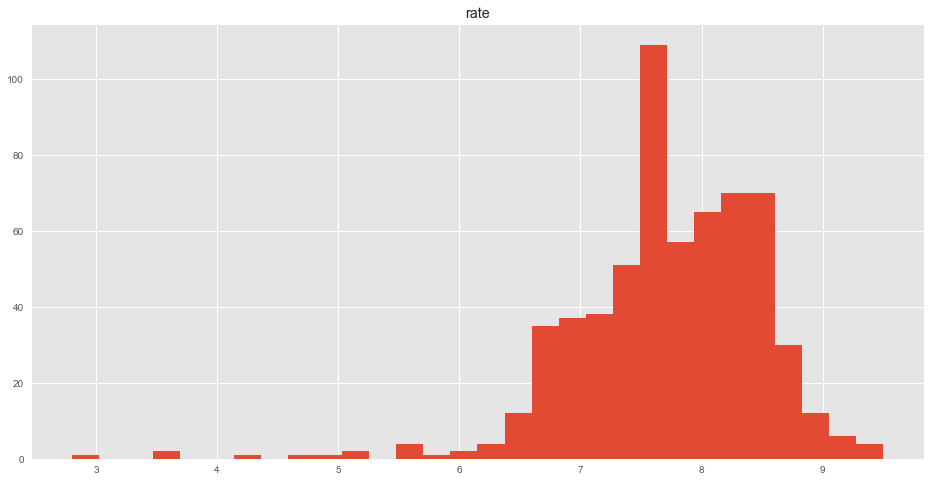

In [254]:
df[['rate']].hist(figsize=(16,8), bins=30)

In [152]:
#Labeling the target into above average and below averaged based on the median value.
rate = []
for i in df['rate']:
    if i < 7.8:
        rate.append('below')
    elif i >= 7.8:
        rate.append('above')
   
rate

['below',
 'above',
 'below',
 'above',
 'above',
 'above',
 'below',
 'below',
 'below',
 'below',
 'above',
 'below',
 'below',
 'above',
 'above',
 'below',
 'below',
 'below',
 'below',
 'above',
 'below',
 'below',
 'above',
 'below',
 'above',
 'above',
 'below',
 'above',
 'below',
 'above',
 'below',
 'above',
 'above',
 'above',
 'above',
 'above',
 'above',
 'below',
 'below',
 'above',
 'below',
 'above',
 'above',
 'above',
 'above',
 'above',
 'below',
 'below',
 'below',
 'below',
 'above',
 'above',
 'below',
 'below',
 'above',
 'above',
 'below',
 'below',
 'above',
 'below',
 'above',
 'above',
 'above',
 'above',
 'below',
 'above',
 'above',
 'above',
 'above',
 'above',
 'above',
 'above',
 'below',
 'above',
 'above',
 'below',
 'above',
 'above',
 'below',
 'below',
 'below',
 'above',
 'below',
 'below',
 'above',
 'above',
 'below',
 'above',
 'below',
 'above',
 'above',
 'above',
 'below',
 'above',
 'below',
 'below',
 'below',
 'below',
 'above',
 'above',


In [153]:
#Inserting the new labeled column into the data frame
df['ratelabel'] = rate

In [155]:
#Defining target and features for modeling
y = df['ratelabel']
X = df.drop(['rate','ratelabel'], axis=1)


In [156]:
print X.describe()
print X.dtypes

          episodes  popularity     ratecount     reviews     runtime
count   615.000000  615.000000  6.150000e+02  615.000000  615.000000
mean    120.105691  278.822764  5.996564e+04  140.986992   42.087137
std     298.364866  291.400710  1.016554e+05  137.109278   24.382816
min       0.000000    0.000000  1.010900e+04    3.000000   11.000000
25%      32.000000    0.000000  1.652150e+04   55.000000   30.000000
50%      67.000000  197.000000  2.634000e+04   92.000000   42.087137
75%     117.500000  479.500000  5.647050e+04  171.000000   45.000000
max    4227.000000  994.000000  1.215647e+06  958.000000  535.000000
cast           object
country        object
creator        object
date           object
episodes        int64
genre          object
language       object
popularity      int64
production     object
ratecount       int64
reviews         int64
runtime       float64
titles         object
dtype: object


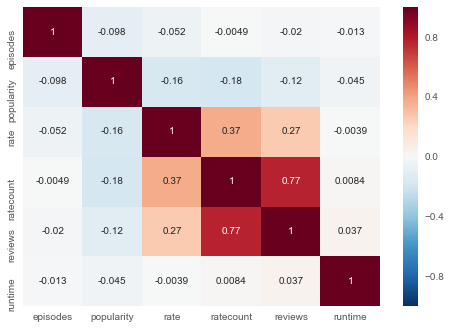

In [256]:
#Checking correlation of the numeric variables
sns.heatmap(df.corr(), annot = True)

In [157]:
#Subsetting the features to get dummied and dummifying them:
nlp = df.drop(['episodes', 'titles', 'popularity', 'ratecount' , 'reviews' , 'runtime', 'rate', 'ratelabel'], axis=1)
dummies = pd.get_dummies(nlp)
#Subsetting the non categorical features
df1 = df[['episodes', 'popularity', 'ratecount' , 'reviews' , 'runtime']]

In [161]:
#Merging dummies and numeric features into one dataframe
data = pd.concat([dummies, df1], axis=1)
data.shape

(615, 2243)

In [195]:
#Getting features and scaling them:
X_ = data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X_)

In [196]:
#Train test split and stratifying data
from sklearn import cross_validation, datasets 
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = cross_validation.train_test_split(Xs,y,train_size=.8, stratify=y)



In [197]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

cv = StratifiedKFold(n_splits=3, random_state=21, shuffle=True)

In [198]:
#baseline
print df['ratelabel'].value_counts()
baseline = 314./len(df['ratelabel'])

print baseline

above    314
below    301
Name: ratelabel, dtype: int64
0.510569105691


In [203]:
#First Model to test: Decision Trees
#Score is better than baseline
dt = DecisionTreeClassifier(class_weight='balanced')
s = cross_val_score(dt, x_train, y_train, cv=cv)
print("{} Score:\t{:0.3} ± {:0.3}".format("Decision Tree", s.mean().round(3), s.std().round(3)))

Decision Tree Score:	0.624 ± 0.023


In [204]:
#Checking scores for ensembles: bagging, random forest and extra trees:
#Bagging scored better
bdt1 = BaggingClassifier(DecisionTreeClassifier())
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1, n_estimators=100)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)

def score(model, name):
    s = cross_val_score(model, x_train, y_train, cv=cv)
    print("{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3)))

score(dt, "Decision Tree")
score(bdt1, "Bagging DT")
score(rf, "Random Forest")
score(et, "Extra Trees")

Decision Tree Score:	0.632 ± 0.018
Bagging DT Score:	0.675 ± 0.042
Random Forest Score:	0.659 ± 0.037
Extra Trees Score:	0.598 ± 0.015


In [206]:
#Scoring second model: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
lg = LogisticRegression()

scores = cross_val_score(lg, x_train, y_train, cv=5)
print scores.mean(), scores.std()

0.567306122449 0.0327245136595


In [210]:
#Scoring Lasso Logistic Regression
#Scored better than simple Logistic Regression but not better than Bagging trees
lasso_cv = LogisticRegressionCV(Cs=200, penalty='l1', solver='liblinear')
lasso_cv.fit(x_train, y_train)
best_c = lasso_cv.C_[0]
lasso = LogisticRegression(penalty='l1', C=best_c)
scores = cross_val_score(lasso, x_train, y_train, cv=5)
print scores.mean(), scores.std()


0.628163265306 0.0215361729931


In [211]:
#Scoring Ridge Logistic Regression
#slightly better than simple Logistic Regression
ridge_cv = LogisticRegressionCV(Cs=20, penalty='l2')
ridge_cv.fit(x_train, y_train)
best_c = ridge_cv.C_[0]
ridge = LogisticRegression(penalty='l2', C=best_c)
scores = cross_val_score(ridge, x_train, y_train, cv=5)
print scores.mean(), scores.std()

0.571510204082 0.0472662225423


In [213]:
#Decided to use Bagging Trees as model
#fitting the model
bdt1.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [242]:
#Getting feature importance:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bdt1.estimators_
], axis=0)
feature_importances

array([ 0.00140412,  0.00073231,  0.        , ...,  0.24039827,
        0.11484673,  0.08143004])

In [261]:
#Visualizing feature importance
features = pd.DataFrame(zip(feature_importances),
                           index=X_.columns, columns=['feature']).sort_values('feature',ascending=False)  
features.head(50)

,feature
ratecount,0.240398
reviews,0.114847
runtime,0.081430
episodes,0.078285
popularity,0.065470
genre_Action,0.017179
genre_Animation,0.014557
genre_Drama,0.011886
genre_Comedy,0.009692
"country_USA, Canada",0.006473


In [262]:
features.tail(10)

,feature
"creator_Jeff 'Swampy' Marsh, Dan Povenmire",0.0
"creator_Jean Chalopin, Andy Heyward, Bruno Bianchi",0.0
creator_Jay Beattie,0.0
creator_Jason Rothenberg,0.0
creator_Jason Katims,0.0
creator_Jason Gann,0.0
creator_Janet Tamaro,0.0
creator_Jane Espenson,0.0
creator_Jane Campion,0.0
creator_Terri Minsky,0.0


In [214]:
#prediting y for test data
pred = bdt1.predict(x_test)

In [219]:
#scoring the model
#performed better than baseline by 23%
bdt1.score(x_test, y_test)

0.73983739837398377